In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df=pd.read_csv("fraud_detection_csv.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<AxesSubplot:xlabel='type', ylabel='step'>

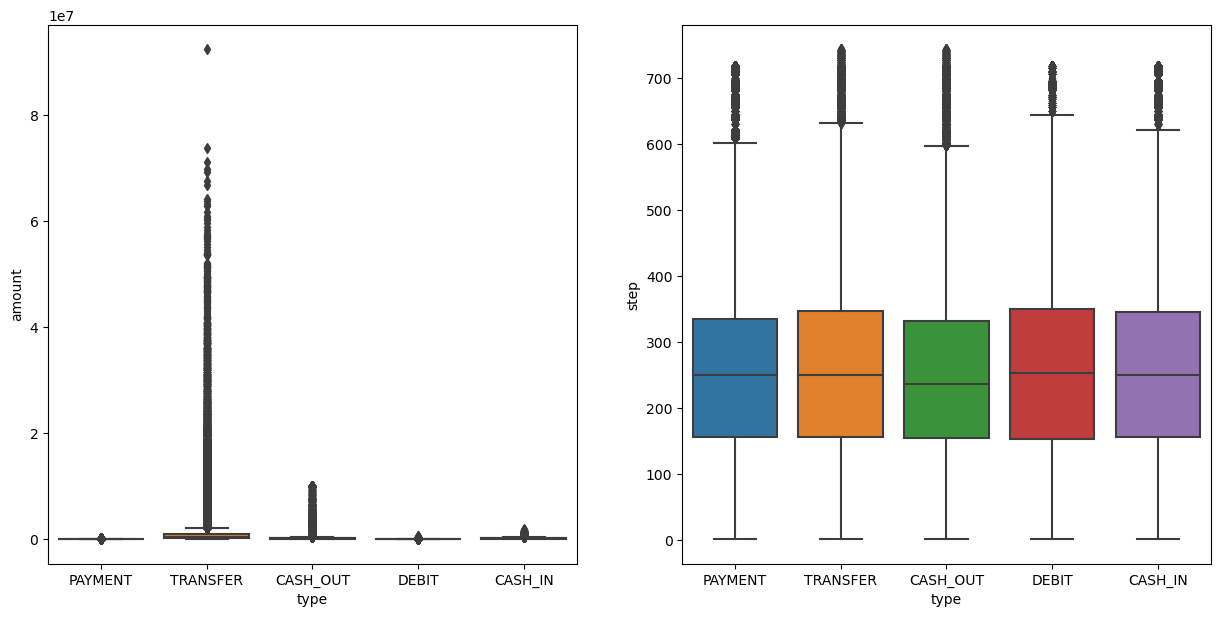

In [3]:
f, ax = plt.subplots(figsize = (15,7), nrows = 1, ncols =2 )
sns.boxplot(data = df, x= 'type', y='amount', ax=ax[0])
sns.boxplot(data = df, x= 'type', y='step', ax = ax[1])

In [4]:
df.sample(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6101409,524,CASH_OUT,145925.87,C1090179177,21150.00,0.00,C703836942,0.00,145925.87,0,0
156544,12,PAYMENT,21217.05,C1398388514,50728.00,29510.95,M1989367667,0.00,0.00,0,0
2066583,181,CASH_IN,134509.38,C216116563,0.00,134509.38,C904600731,5031472.98,4896963.60,0,0
1342885,137,TRANSFER,1756104.81,C894623950,0.00,0.00,C971549043,1846259.12,3602363.93,0,0
4151536,303,CASH_IN,127285.17,C2049687730,1389082.67,1516367.84,C1859287463,647182.67,519897.50,0,0
6355690,709,TRANSFER,164044.38,C1979476467,0.00,0.00,C344963701,184222.55,348266.93,0,0
2632798,209,PAYMENT,13263.85,C1757812255,120601.80,107337.95,M143892112,0.00,0.00,0,0
559555,22,PAYMENT,19076.38,C299091549,37592.00,18515.62,M230793811,0.00,0.00,0,0
2857959,227,CASH_OUT,55328.93,C395265796,113256.00,57927.07,C1460246470,274726.57,330055.50,0,0
1484301,141,PAYMENT,19145.89,C884343441,0.00,0.00,M1133771948,0.00,0.00,0,0


In [5]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.isnull().sum()



step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
df2 = df.drop(df.columns[[3, 6, 10]], axis=1)

In [12]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [13]:
zeros,ones = df2.isFraud.value_counts()

fr = df2[df2['isFraud']==1]
nfr  = df2[df2['isFraud']==0]

nfr = nfr.sample(n=ones, replace=False)
blncd = pd.concat([fr,nfr],axis = 0)

In [14]:
blncd

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
251,1,TRANSFER,2806.00,2806.00,0.00,0.00,0.00,1
252,1,CASH_OUT,2806.00,2806.00,0.00,26202.00,0.00,1
680,1,TRANSFER,20128.00,20128.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...
4685292,331,CASH_IN,125703.48,8950470.15,9076173.63,3764908.10,3639204.62,0
6213891,588,CASH_IN,181093.99,596.00,181689.99,29061.71,0.00,0
4346707,308,PAYMENT,3456.68,0.00,0.00,0.00,0.00,0
2336035,188,TRANSFER,532780.14,0.00,0.00,3637128.90,4169909.04,0


In [15]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
print("Before Encoding",blncd['type'].unique())


Before Encoding ['TRANSFER' 'CASH_OUT' 'CASH_IN' 'PAYMENT' 'DEBIT']


In [17]:
label = LabelEncoder()
blncd['type'] = label.fit_transform(blncd['type'])
print("After Encoding",blncd['type'].unique())

After Encoding [4 1 0 3 2]


In [18]:
X = blncd.copy()
X = X.drop(columns=['isFraud'])
y = blncd.isFraud

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)


In [20]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

prediction  = model.predict(X_test)
prediction_train = model.predict(X_train)

train_accuracy = accuracy_score(prediction_train,y_train)
test_accuracy = accuracy_score(prediction,y_test)




print("training Accuracy:",train_accuracy)
print("testing Accuracy:",test_accuracy)

training Accuracy: 0.9013698630136986
testing Accuracy: 0.8995739500912964


In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1571   72]
 [ 258 1385]]


Numpy meshgrid is a tool for numeric data manipulation in Python.

We use Numpy meshgrid to create a rectangular grid of x and y values.

More specifically, meshgrid creates coordinate values that enable us to construct a rectangular grid of values.

In [23]:
xv, yv = np.meshgrid(X, y, sparse=True)
xv

array([[  1.,   4., 181., ...,   0.,   0.,   0.]])

In [24]:
yv



array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

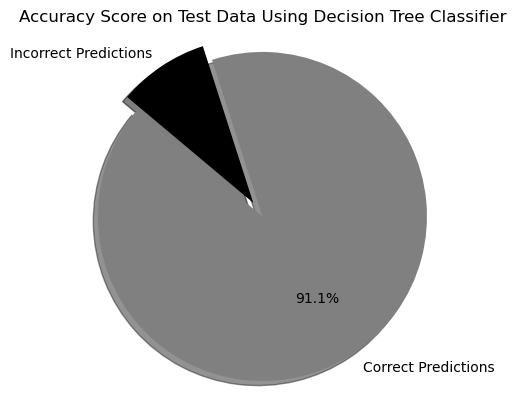

In [66]:
test_data_accuracy = 0.9106544901065449

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [test_data_accuracy, 1 - test_data_accuracy]
colors = ['grey', 'black']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Accuracy Score on Test Data Using Decision Tree Classifier')
plt.show()

In [26]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


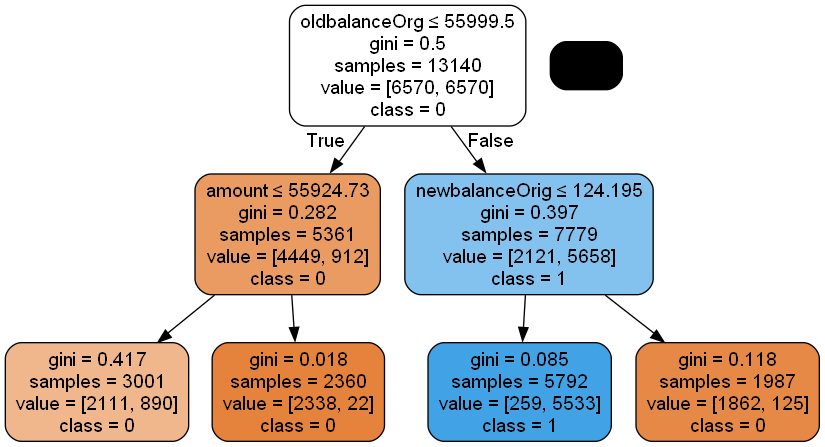

In [28]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus

# Export the decision tree to DOT format
dot_data = tree.export_graphviz(model, out_file=None,  
                               filled=True, rounded=True,
                               special_characters=True,
                               feature_names=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],
                               class_names=['0','1'])

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate an image of the graph
Image(graph.create_png())


In [33]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=7,
                                       n_estimators=100, oob_score=True)

In [50]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_jobs=-1, oob_score=True, random_state=42)

In [51]:
classifier_rf.oob_score_

0.9775613150113063

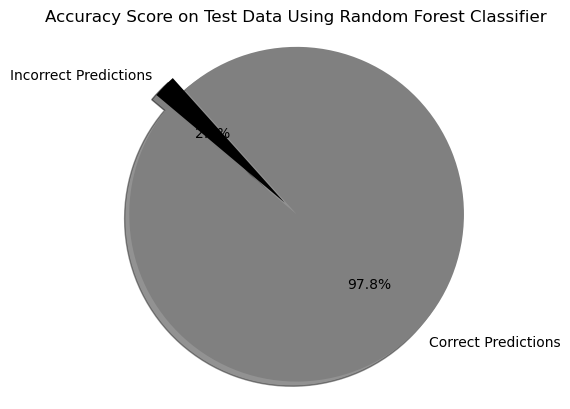

In [65]:
test_data_accuracy = 0.9775613150113063

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [test_data_accuracy, 1 - test_data_accuracy]
colors = ['grey', 'black']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Accuracy Score on Test Data Using Random Forest Classifier')
plt.show()